## Dummy coding

Our dataset contains categorical values that we want to use for the machine learning models. To realize this we will dummy code those variables

In [1]:
import numpy as np
import pandas as pd
#Reading File path
import os
os.chdir('/Users/pim/Downloads') 
os.getcwd()

'/Users/pim/Downloads'

In [ ]:
#creating dataframe
funda = pd.read_csv('funda_price.csv')
funda.head()

,Unnamed: 0,koopPrijs,perceelOppervlakte,energielabelKlasse,aantalKamers,aantalBadkamers,oppervlakte,volledigeOmschrijving,categorieObject
0,0,139000.0,208.0,C,3,1.0,62,"Ruimte, vrijheid, en altijd het water en de we...",Woonhuis
1,1,209000.0,148.0,B,5,1.0,136,Verrassend ruime tussenwoning nabij het centru...,Woonhuis
2,2,267500.0,70.0,C,3,1.0,70,- ENGLISH TRANSLATION - \n\nOn the 21st of Sep...,Appartement
3,3,349000.0,244.0,C,5,1.0,144,Wonen in een zeer royaal bemeten geschakelde 2...,Woonhuis
4,4,495000.0,4500.0,C,8,1.0,323,Landgoed Junne is een eeuwenoud landgoed en li...,Woonhuis


The columns that we will convert are 'energielabelKlasse', 'volledigeOmschrijving' and 'categorieObject'. 

For 'volledigeOmschrijving' we will extract numerical values from the text. We will do this using topic modelling

In [ ]:
#Drops the index column

funda=funda[['koopPrijs', 'perceelOppervlakte', 'volledigeOmschrijving', 'energielabelKlasse', 'aantalKamers', 'aantalBadkamers', 'oppervlakte', 'categorieObject']]
funda.head()

,koopPrijs,perceelOppervlakte,volledigeOmschrijving,energielabelKlasse,aantalKamers,aantalBadkamers,oppervlakte,categorieObject
0,139000.0,208.0,"Ruimte, vrijheid, en altijd het water en de we...",C,3,1.0,62,Woonhuis
1,209000.0,148.0,Verrassend ruime tussenwoning nabij het centru...,B,5,1.0,136,Woonhuis
2,267500.0,70.0,- ENGLISH TRANSLATION - \n\nOn the 21st of Sep...,C,3,1.0,70,Appartement
3,349000.0,244.0,Wonen in een zeer royaal bemeten geschakelde 2...,C,5,1.0,144,Woonhuis
4,495000.0,4500.0,Landgoed Junne is een eeuwenoud landgoed en li...,C,8,1.0,323,Woonhuis


In [ ]:
#Convert 'energielabelKlasse' and 'categorieObject' to values
funda_clean = pd.get_dummies(funda, prefix = ['energielabelKlasse', 'categorieObject'], columns=['energielabelKlasse', 'categorieObject'])
funda_clean.head()

,koopPrijs,perceelOppervlakte,volledigeOmschrijving,aantalKamers,aantalBadkamers,oppervlakte,energielabelKlasse_A,energielabelKlasse_A+,energielabelKlasse_A++,energielabelKlasse_A+++,energielabelKlasse_A++++,energielabelKlasse_A+++++,energielabelKlasse_B,energielabelKlasse_C,energielabelKlasse_D,energielabelKlasse_E,energielabelKlasse_F,energielabelKlasse_G,categorieObject_Appartement,categorieObject_Woonhuis
0,139000.0,208.0,"Ruimte, vrijheid, en altijd het water en de we...",3,1.0,62,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,209000.0,148.0,Verrassend ruime tussenwoning nabij het centru...,5,1.0,136,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,267500.0,70.0,- ENGLISH TRANSLATION - \n\nOn the 21st of Sep...,3,1.0,70,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,349000.0,244.0,Wonen in een zeer royaal bemeten geschakelde 2...,5,1.0,144,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,495000.0,4500.0,Landgoed Junne is een eeuwenoud landgoed en li...,8,1.0,323,0,0,0,0,0,0,0,1,0,0,0,0,0,1


## Topic modelling

In [ ]:
import pandas as pd
import numpy as np
import spacy #pip install -U spacy
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # to make jupyter print all outputs, not just the last one
import pickle
import os
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import NMF
import re

In [ ]:
#Clean description
funda_clean = funda_clean.replace('\n',' ', regex=True)
funda_clean = funda_clean.replace('\t',' ', regex=True)
funda_clean = funda_clean.replace('\n\n',' ', regex=True)
funda_clean = funda_clean.replace('\n\n\n',' ', regex=True)
funda_clean = funda_clean.replace('\n\n\n\n',' ', regex=True)
funda_clean = funda_clean.replace('\t',' ', regex=True)
funda_clean = funda_clean.replace('\t\t',' ', regex=True)
funda_clean = funda_clean.replace('\t\t\t',' ', regex=True)
funda_clean = funda_clean.replace('\t\t\t\t',' ', regex=True)

In [ ]:
# Take text as vector
text = funda_clean['volledigeOmschrijving'].tolist()

In [ ]:
#python -m spacy download nl_core_news_sm
# next, this command will load the dutch language model of spacy, which we have installed using the line above
nlp = spacy.load('nl_core_news_sm')
type(nlp)

spacy.lang.nl.Dutch

In [ ]:
# Tokenize first description
text[0]

for token in nlp(text[0]):
    print(token)

'Ruimte, vrijheid, en altijd het water en de weides om je heen. Met een tikkeltje romantiek, nostalgie, het voortdurende vakantiegevoel en vooral rust, is het leven op een woonark nét even anders. Op deze ark voelt u pas echt hoe het is om vrij te wonen. Stilletjes deinend, kabbelend water en voorbij zwemmende eendjes… Wij bieden u nu de kans om dit zelf te gaan ervaren!  Algemeen • Rustig gelegen in breed vaarwater • Nabij dorp met supermarkt, snackbar en café-restaurant • Landelijke omgeving • Omsloten tuin (300 m2) met berging op zuidoosten (gebruiksvergoeding aan gemeente) • Ligplaatscanon via Hollands Noorderkwartier • Garage en parkeerruimte aan de wegzijde  Omschrijving Alles is gelijkvloers in deze charmante woonark. Vanuit de tuin stapt u over de loopbrug de ark binnen en ervaart u direct de bijzondere sfeer van het wonen op het water. De corridor loopt over de gehele lengte van de ark. Links is de knusse woonkamer, met daarachter de keuken met koelkast, wasemkap en elektrisch

Ruimte
,
vrijheid
,
en
altijd
het
water
en
de
weides
om
je
heen
.
Met
een
tikkeltje
romantiek
,
nostalgie
,
het
voortdurende
vakantiegevoel
en
vooral
rust
,
is
het
leven
op
een
woonark
nét
even
anders
.
Op
deze
ark
voelt
u
pas
echt
hoe
het
is
om
vrij
te
wonen
.
Stilletjes
deinend
,
kabbelend
water
en
voorbij
zwemmende
eendjes
…
Wij
bieden
u
nu
de
kans
om
dit
zelf
te
gaan
ervaren
!
 
Algemeen
•
Rustig
gelegen
in
breed
vaarwater
•
Nabij
dorp
met
supermarkt
,
snackbar
en
café-restaurant
•
Landelijke
omgeving
•
Omsloten
tuin
(
300
m2
)
met
berging
op
zuidoosten
(
gebruiksvergoeding
aan
gemeente
)
•
Ligplaatscanon
via
Hollands
Noorderkwartier
•
Garage
en
parkeerruimte
aan
de
wegzijde
 
Omschrijving
Alles
is
gelijkvloers
in
deze
charmante
woonark
.
Vanuit
de
tuin
stapt
u
over
de
loopbrug
de
ark
binnen
en
ervaart
u
direct
de
bijzondere
sfeer
van
het
wonen
op
het
water
.
De
corridor
loopt
over
de
gehele
lengte
van
de
ark
.
Links
is
de
knusse
woonkamer
,
met
daarachter
de
keuken
met
koelkast
,


In [ ]:
# Entities recognition
for i in nlp(text[0]).ents:
    print(i, i.label_)

Stilletjes GPE
ervaren! ORG
Rustig GPE
300 m2 QUANTITY
Ligplaatscanon NORP
Hollands Noorderkwartier • FAC
Omschrijving Alles PERSON
cave NORP
vrijheid! ORG
Zuurbier NORP
06 5339 DATE


In [ ]:
# Adding custom stop words before performing tokenization
nlp.Defaults.stop_words |= {"€", "II", "m.", "circa", "afm", "m", "x", "m³.", "ca.", "m³", "±", "m²", "vind", "minuten", "twee", "totaal", "1e", "2e", "+", "m2", "o.a.",}

In [ ]:
# perform tokenization
docs = [nlp.make_doc(x) for x in text]

In [ ]:
stopwords = nlp.Defaults.stop_words
print(stopwords)

{'meer', 'ben', 'ikzelf', 'had', 'toe', 'hun', 'in', 'onze', 'andere', 'voorts', '1e', 'zo', 'werden', 'overigens', 'uw', 'zullen', 'omdat', 'mocht', 'allen', 'jijzelf', 'juist', 'dat', 'mezelf', 'door', 'wel', 'gelijk', 'dezelfde', 'of', 'wordt', 'geworden', 'opzij', 'precies', 'iemand', 'evenwel', 'geweest', 'weg', 'thans', 'jij', 'gewoon', 'er', 'geen', 'aldus', 'gemogen', 'waren', 'weinige', 'vaak', 'voort', 'af', 'vanuit', 'zou', 'bovendien', 'zo’n', 'klaar', 'welke', 'hebt', 'bovenal', 'eerder', 'tamelijk', 'bijvoorbeeld', 'buiten', 'mochten', 'aan', 'betreffende', 'daar', 'ikke', 'ongeveer', 'hoewel', 'sinds', 'terwijl', 'mijn', 'weer', 'mogelijk', 'wilde', 'altijd', 'alleen', 'meesten', 'het', 'wier', 'mogen', 'moeten', 'voorbij', 'inzake', 'wij', 'omhoog', 'voorheen', 'allebei', 'volgens', 'steeds', 'ff', 'van', 'zeker', 'elke', 'doorgaans', 'gedurende', 'uwen', 'voorop', 'te', 'naar', 'waar', 'uwe', 'weinig', 'eens', 'bent', 'zulke', 'o.a.', 'gegeven', 'publ', 'krachtens', 'h

In [ ]:
# Check if string is composed of digits and punctuations only
digit_re = re.compile('^([0-9]|[\\.,])*$€')

In [ ]:
# Cleaning tokens
tokens_cleaned = []
for doc in docs:
    new_tokens = []
    for token in doc:
        if not token.is_stop and not token.is_punct and not re.match(digit_re, token.text):
            new_tokens.append(token.text)
    tokens_cleaned.append(new_tokens)

In [ ]:
tokens_cleaned[0:5]

[['Ruimte',
  'vrijheid',
  'water',
  'weides',
  'heen',
  'tikkeltje',
  'romantiek',
  'nostalgie',
  'voortdurende',
  'vakantiegevoel',
  'rust',
  'leven',
  'woonark',
  'nét',
  'ark',
  'voelt',
  'echt',
  'wonen',
  'Stilletjes',
  'deinend',
  'kabbelend',
  'water',
  'zwemmende',
  'eendjes',
  'bieden',
  'kans',
  'gaan',
  'ervaren',
  ' ',
  'Algemeen',
  'Rustig',
  'gelegen',
  'breed',
  'vaarwater',
  'dorp',
  'supermarkt',
  'snackbar',
  'café-restaurant',
  'Landelijke',
  'omgeving',
  'Omsloten',
  'tuin',
  '300',
  'm2',
  'berging',
  'zuidoosten',
  'gebruiksvergoeding',
  'gemeente',
  'Ligplaatscanon',
  'via',
  'Hollands',
  'Noorderkwartier',
  'Garage',
  'parkeerruimte',
  'wegzijde',
  ' ',
  'Omschrijving',
  'gelijkvloers',
  'charmante',
  'woonark',
  'tuin',
  'stapt',
  'loopbrug',
  'ark',
  'ervaart',
  'direct',
  'bijzondere',
  'sfeer',
  'wonen',
  'water',
  'corridor',
  'loopt',
  'gehele',
  'lengte',
  'ark',
  'Links',
  'knuss

In [ ]:
# Pass dummy function to the tokenizer and preprocessor parameters of count vectorizer because we already calculated our tokens
def dummy(doc):
    return doc

count_vectorizer = CountVectorizer(
    tokenizer=dummy,
    preprocessor=dummy,
)

frequency_matrix = count_vectorizer.fit_transform(tokens_cleaned)

In [ ]:
type(frequency_matrix)

scipy.sparse.csr.csr_matrix

In [ ]:
count_vectorizer.get_feature_names()[:50]

[' ',
 '  ',
 '   ',
 '    ',
 '     ',
 '      ',
 '       ',
 '        ',
 '         ',
 '          ',
 '           ',
 '            ',
 '             ',
 '              ',
 '               ',
 '                ',
 '                 ',
 '                  ',
 '                   ',
 '                    ',
 '                     ',
 '                      ',
 '                       ',
 '                        ',
 '                         ',
 '                          ',
 '                           ',
 '                            ',
 '                             ',
 '                              ',
 '                               ',
 '                                ',
 '                                 ',
 '                                  ',
 '                                   ',
 '                                    ',
 '                                     ',
 '                                      ',
 '                                       ',
 '                       

In [ ]:
count_vectorizer.get_feature_names()[-2000:-1950]

['~2.6',
 '~45',
 '~5m2',
 '~ACHTERTUIN~',
 '~ALGEMEEN~',
 '~Algemeen~',
 '~BEGANE',
 '~BEREIKBAARHEID~',
 '~BESTEMMINGSPLAN~',
 '~BIEDEN',
 '~BIEDING~',
 '~BIJZONDERHEDEN~',
 '~CIRCA',
 '~CONCEPT~',
 '~Carport',
 '~Circa',
 '~EERSTE',
 '~ERFPACHT~',
 '~EXCLUSIEF',
 '~GARAGE',
 '~Het',
 '~INDELING',
 '~INDELING~',
 '~INSCHRIJVING~',
 '~INTERESSE~',
 '~Indeling~',
 '~KELDER~',
 '~KENMERKEN',
 '~KENMERKEN~',
 '~Kenmerken~',
 '~LOCATIE~',
 '~Let',
 '~OMGEVING~',
 '~OMSCHRIJVING~',
 '~OUD-BEIJERLAND~',
 '~TUIN',
 '~TUIN~',
 '~TWEEDE',
 '~Unieke',
 '~VERENIGING',
 '~VERKOOP',
 '~VERKOPER',
 '~VOOR',
 '~Voldoende',
 '~W96~',
 '~WONINGEN~',
 '~Zeer',
 '~Zonnige',
 '~circa',
 '~praktische']

In [ ]:
count_vectorizer = CountVectorizer(
    tokenizer=dummy,
    preprocessor=dummy,
    max_features=4000
    )
frequency_matrix = count_vectorizer.fit_transform(tokens_cleaned)

In [ ]:
frequency_matrix

<210876x4000 sparse matrix of type '<class 'numpy.int64'>'
	with 28484925 stored elements in Compressed Sparse Row format>

In [ ]:
tfd_idf_trans = TfidfTransformer()
tf_idf_matrix = tfd_idf_trans.fit_transform(frequency_matrix)

In [ ]:
tf_idf_matrix

<210876x4000 sparse matrix of type '<class 'numpy.float64'>'
	with 28484925 stored elements in Compressed Sparse Row format>

In [ ]:
# We use 10 as the number of topics
model = NMF(n_components=10, init='nndsvd')

# fit the model
model.fit(X=tf_idf_matrix)

NMF(init='nndsvd', n_components=10)

In [ ]:
# Mapping topics to word weights
model.components_
model.components_.shape

array([[9.57046479e+00, 4.03572495e-01, 3.55285047e-01, ...,
        0.00000000e+00, 1.91489308e-04, 1.82243979e-02],
       [3.77237966e-01, 1.32940274e-01, 3.02088281e-02, ...,
        1.14133048e-04, 2.99144901e-02, 6.29287947e-03],
       [4.70890445e-01, 1.64911112e-01, 8.00437944e-02, ...,
        0.00000000e+00, 8.28876255e-03, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.77071045e+00, 4.26498137e-01, ...,
        0.00000000e+00, 0.00000000e+00, 6.28590602e-03],
       [1.63929972e+00, 1.38821331e+00, 1.85005454e-01, ...,
        1.54714894e-01, 3.39916403e-01, 3.95799693e-02],
       [7.13547676e-01, 6.25005767e-01, 1.74713172e-01, ...,
        0.00000000e+00, 2.51060406e-01, 0.00000000e+00]])

(10, 4000)

In [ ]:
def get_topics(model, n_top_words):

    feature_names = count_vectorizer.get_feature_names()
    d = {}
    for i in range(model.n_components):
        words_ids = model.components_[i].argsort()[:-20 -1:-1]
        words = [feature_names[key] for key in words_ids]
        d['Topic # ' + '{:02d}'.format(i+1)] = words
    return pd.DataFrame(d)

In [ ]:
get_topics(model, 10)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,,the,x,appartement,woningen,Meetinstructie,ca.,voorzien,ruimte,garage
1,3,and,m,balkon,appartementen,particuliere,m2,woning,woning,m2
2,Bouwjaar,with,Slaapkamer,complex,type,NEN2580,m.,verdieping,huis,v.v
3,toilet,a,m.,per,m2,koopovereenkomst,v.v,achtertuin,,bijkeuken
4,2,The,,maand,fase,verschillen,x,,grote,woning
5,,to,3.00,gelegen,wonen,meten,Slaapkamer,gelegen,tuin,tuin
6,1,floor,voorzien,lift,standaard,verkoper,Bouwjaar,achterzijde,,ruime
7,Inhoud,on,Woonkamer,uitzicht,hoekwoningen,meting,Inhoud,voorzijde,ligt,toilet
8,Badkamer,room,2,voorzien,,gebruiksoppervlakte,Woonoppervlakte,keuken,heerlijk,vrijstaande
9,grond,apartment,Badkamer,berging,project,afrondingen,6,toegang,genieten,grond


In [ ]:
document_topics = model.transform(X=tf_idf_matrix)
document_topics = pd.DataFrame(document_topics)
main_topic = document_topics.idxmax(axis=1)
topics = ["Topic " + str(x) for x in range(1, 11)]
main_topic = main_topic.apply(lambda x: topics[x])

In [ ]:
funda_clean['main_topic'] = main_topic

In [ ]:
funda_clean.loc[lambda x: x.main_topic == "Topic 1"].iloc[:20]

,koopPrijs,perceelOppervlakte,aantalKamers,aantalBadkamers,oppervlakte,energielabelKlasse_A,energielabelKlasse_A+,energielabelKlasse_A++,energielabelKlasse_A+++,energielabelKlasse_A++++,energielabelKlasse_A+++++,energielabelKlasse_B,energielabelKlasse_C,energielabelKlasse_D,energielabelKlasse_E,energielabelKlasse_F,energielabelKlasse_G,categorieObject_Appartement,categorieObject_Woonhuis,main_topic
5,162500.0,104.0,4,1.0,68,0,0,0,0,0,0,0,1,0,0,0,0,0,1,Topic 1
17,300000.0,293.0,4,1.0,148,0,0,0,0,0,0,0,1,0,0,0,0,0,1,Topic 1
31,194000.0,312.0,5,1.0,108,0,0,0,0,0,0,0,1,0,0,0,0,0,1,Topic 1
33,329000.0,208.0,4,1.0,80,0,0,0,0,0,0,0,1,0,0,0,0,0,1,Topic 1
43,270000.0,146.0,4,1.0,124,0,0,0,0,0,0,0,1,0,0,0,0,0,1,Topic 1
51,470000.0,250.0,5,1.0,140,0,0,0,0,0,0,0,1,0,0,0,0,0,1,Topic 1
63,239000.0,208.0,5,1.0,118,0,0,0,0,0,0,0,1,0,0,0,0,0,1,Topic 1
67,300000.0,216.0,6,1.0,130,0,0,0,0,0,0,0,1,0,0,0,0,0,1,Topic 1
68,205000.0,66.0,5,1.0,100,0,0,0,0,0,0,0,1,0,0,0,0,0,1,Topic 1
103,337000.0,208.0,5,1.0,126,0,0,0,0,0,0,0,1,0,0,0,0,0,1,Topic 1


Now that we have used topic modelling for the description, we can convert them to dummy variables

In [ ]:
#Drop 'volledigeOmschrijving'
del funda_clean['volledigeOmschrijving']

#Convert 'main_topic' to values
funda_clean = pd.get_dummies(funda_clean, prefix = ['main_topic'], columns=['main_topic'])
funda_clean.head()


,koopPrijs,perceelOppervlakte,aantalKamers,aantalBadkamers,oppervlakte,energielabelKlasse_A,energielabelKlasse_A+,energielabelKlasse_A++,energielabelKlasse_A+++,energielabelKlasse_A++++,...,main_topic_Topic 1,main_topic_Topic 10,main_topic_Topic 2,main_topic_Topic 3,main_topic_Topic 4,main_topic_Topic 5,main_topic_Topic 6,main_topic_Topic 7,main_topic_Topic 8,main_topic_Topic 9
0,139000.0,208.0,3,1.0,62,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,209000.0,148.0,5,1.0,136,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,267500.0,70.0,3,1.0,70,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,349000.0,244.0,5,1.0,144,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,495000.0,4500.0,8,1.0,323,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


## Random Forest

In [ ]:
# Libraries and options
# If error [No module named 'sklearn'], in terminal: conda install -c conda-forge scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
%matplotlib notebook
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

Train with the training set, use the validation set for tuning, then generate an accuracy estimate with the testing set.

The overall steps are:

1) Divide the available data into training, validation and test set
2) Select an algorithm and training parameters
3) Train the model using the training set
4) Evaluate the model using the validation set
5) Repeat steps 2 through 4 using different algorithms and training parameters
6) Select the best model and train it using data from the training and validation set
7) Assess this final model using the test set.

In [ ]:

y = funda_clean[['koopPrijs']]
x = funda_clean.drop(['koopPrijs'],axis = 1)


#set aside 20% of train and test data for evaluation
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=9)

#use the same function above for the validation set
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.2, random_state=9)

print("X_train shape: {}".format(x_train.shape))
print("X_test shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("x_val shape: {}".format(x_val.shape))
print("y_val shape: {}".format(y_val.shape))

X_train shape: (134960, 28)
X_test shape: (42176, 28)
y_train shape: (134960, 1)
y_test shape: (42176, 1)
x_val shape: (33740, 28)
y_val shape: (33740, 1)


In [ ]:
#Train the model
from sklearn.metrics import r2_score
Rf = RandomForestRegressor(n_estimators = 15,
                              random_state = 20,
                              n_jobs = -1)
Rf.fit(x_train,y_train)

#Predict the model
Rf_train_pred = Rf.predict(x_train)
Rf_val_pred = Rf.predict(x_val)


#r2 of training set
print('R Squared on training set:', r2_score(y_train,Rf_train_pred))

#r2 of validation set
print('R Squared on validation set:', r2_score(y_val,Rf_val_pred))




RandomForestRegressor(n_estimators=15, n_jobs=-1, random_state=20)

R Squared on training set: 0.8836386712903841
R Squared on validation set: 0.5364764538322273


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Random Forest Predictions')

Text(0, 0.5, 'True Values')

(0.0, 1000000.0)

(0.0, 1000000.0)

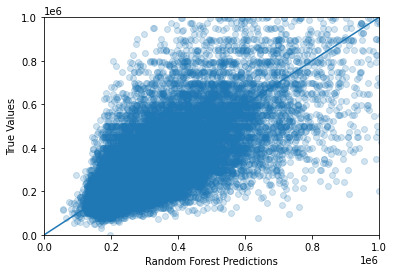

In [ ]:
%matplotlib inline
plt.figure()
plt.scatter(Rf_val_pred, y_val, alpha=0.2)
plt.xlabel('Random Forest Predictions')
plt.ylabel('True Values')
lims = [0, 1000000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

Let's improve this percentage using hyperparameter tuning

There are various hyperparameters that can be controlled in a random forest:
- N_estimators: The number of decision trees being built in the forest. 
- Criterion: The function that is used to measure the quality of splits in a decision tree (Classification Problem).
- Max_depth: The maximum levels allowed in a decision tree.
- Max_features: Maximum number of features used for a node split process. 
- Bootstrap: Bootstrap samples are used when building decision trees if True is selected in bootstrap, else whole data is used for every decision tree.
- Min_samples_split: This parameter decides the minimum number of samples required to split an internal node.
- Min_sample_leaf: This parameter sets the minimum number of data point requirements in a node of the decision tree.

Now we perform model selection, choosing the model that has the best performance on the validation set;

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters in test set
from sklearn.model_selection import GridSearchCV
rf_Model = RandomForestRegressor()
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [ ]:
# Fit the random search model, this might take a while :)
rf_Grid.fit(x_test, y_test)

In [ ]:
#Pick best parameters
rf_Grid.best_params_

In [ ]:
#Train the model on the validation set, using the best parameters obtained from rf_Grid.best_params_
from sklearn.metrics import r2_score
Rf1 = RandomForestRegressor(n_estimators = 20,
                              random_state = 40,
                              n_jobs = -1)
Rf1.fit(x_val,y_val)


# Make predictions on the test set
Rf_test_pred = Rf1.predict(x_test)



#r2 of test set
print('R Squared on test set:', r2_score(y_test,Rf_test_pred))

RandomForestRegressor(n_estimators=20, n_jobs=-1, random_state=40)

R Squared on test set: 0.5238793127538979


In [ ]:
#Train the model on the full train set, using the best parameters obtained from rf_Grid.best_params_
from sklearn.metrics import r2_score
Rf2 = RandomForestRegressor(n_estimators = 20,
                              random_state = 40,
                              n_jobs = -1)
Rf2.fit(x_train,y_train)


# Make predictions on the test set
Rf_test_pred = Rf2.predict(x_test)


#r2 of test set
print('R Squared on test set:', r2_score(y_test,Rf_test_pred))


RandomForestRegressor(n_estimators=20, n_jobs=-1, random_state=40)

R Squared on test set: 0.570537414390996


# Neural Networking

In [ ]:
# We are going to import the following libraries
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import warnings
from plotnine import *
warnings.filterwarnings('ignore')


In [ ]:
# Checking the versions of tensorflow and keras
print('tensorflow: %s' % tensorflow.__version__)
print('keras: %s' % keras.__version__)

tensorflow: 2.7.0
keras: 2.7.0


In [ ]:
# We are going to test the dataset into train, test and validation set
test = funda_clean['koopPrijs']
x = funda_clean(['koopPrijs'],axis = 1)

# We set aside 20% of train and test data for evaluation
x_train, x_test, y_train, y_test = train_test_split(x,test,test_size=0.2, random_state=8)

# We are going to set aside 80% out of the remaining data for the train set
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,train_size=0.8, random_state=8)

print("x_train shape: {}".format(x_train.shape))
print("x_test shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("x_val shape: {}".format(x_val.shape))
print("y_val shape: {}".format(y_val.shape))

x_train shape: (135433, 6)
x_test shape: (42324, 6)
y_train shape: (135433,)
y_test shape: (42324,)
x_val shape: (33859, 6)
y_val shape: (33859,)


In [ ]:
# time to find out how many neurons we need in the input layer
print(f"The number of neurons for the input layer must be: {x_train.shape[1]}")

The number of neurons for the input layer must be: 6


In [ ]:
# The neural network model class instance will be defined
simple_nn = Sequential()
# note that the first command does two things: create a first input layer with 7 nodes, and then a hidden layer with relu activation function
simple_nn.add(Dense(20, input_dim=x_train.shape[1], activation='relu'))
# add the output layer with sigmoid function (the sigmoid function is exactly the same as that used in the formulation of logisitc regression
simple_nn.add(Dense(1, activation='relu'))

In [ ]:
# Print the summary of our neural network model class instance
print(simple_nn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                140       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# We are going to use cross entropy to optimize classification in the backpropagation algorithm.
# For the algorithm for the backpropagation we are going to use adam
simple_nn.compile(loss='mse', optimizer='adam')

In [ ]:
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("x_val shape: {}".format(x_val.shape))
print("y_val shape: {}".format(y_val.shape))

x_train shape: (135433, 6)
y_train shape: (135433,)
x_val shape: (33859, 6)
y_val shape: (33859,)


In [ ]:
# Making sure all the features/variables are compatible
x_train = np.asarray(x_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

In [ ]:
# epoch: one forward-and-backprop pass through every row in the training set
# batch: the number of samples that are considered for each backpropagation update of the weights of the network
# Put the neural network on our training set
simple_nn.fit(x_train, y_train, epochs=150, batch_size = 20)

Epoch 1/150
6772/6772 [==============================] - 27s 4ms/step - loss: 127954984960.0000
Epoch 2/150
6772/6772 [==============================] - 20s 3ms/step - loss: 102948184064.0000
Epoch 3/150
6772/6772 [==============================] - 23s 3ms/step - loss: 78362198016.0000
Epoch 4/150
6772/6772 [==============================] - 21s 3ms/step - loss: 56620146688.0000
Epoch 5/150
6772/6772 [==============================] - 23s 3ms/step - loss: 33535379456.0000
Epoch 6/150
6772/6772 [==============================] - 22s 3ms/step - loss: 25925038080.0000
Epoch 7/150
6772/6772 [==============================] - 20s 3ms/step - loss: 24732817408.0000
Epoch 8/150
6772/6772 [==============================] - 21s 3ms/step - loss: 24514476032.0000
Epoch 9/150
6772/6772 [==============================] - 25s 4ms/step - loss: 24441208832.0000
Epoch 10/150
6772/6772 [==============================] - 28s 4ms/step - loss: 24419735552.0000
Epoch 11/150
6772/6772 [=======================

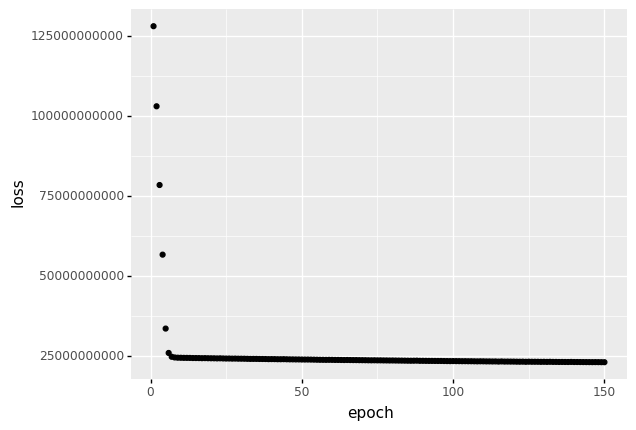

<ggplot: (89322035062)>

In [ ]:
# see what information has been logged during the training process
simple_nn.history.history.keys()

# plot the training loss over epochs
loss_df = pd.DataFrame(simple_nn.history.history['loss'])
loss_df.columns = ['loss']
loss_df = loss_df.assign(epoch = np.arange(1, 151))

(
    ggplot(loss_df, aes(x='epoch', y='loss')) + geom_point()
)

We can see that the loss function is decreasing and and that it reaches it plateau quickly

In [ ]:
# We provide our validation dataset to keras to evaluate the loss on the validation dataset per epoch. This way we might detect if the model starts to overfit, for expample.
simple_nn.fit(x_train, y_train, epochs=150, batch_size = 20, validation_data=(x_val, y_val))

Epoch 1/150
6772/6772 [==============================] - 7s 1ms/step - loss: 23006797824.0000 - val_loss: 24781105152.0000- loss: 2247 - E -
Epoch 2/150
6772/6772 [==============================] - 6s 953us/step - loss: 23022403584.0000 - val_loss: 24745467904.0000- ET
Epoch 3/150
6772/6772 [==============================] - 6s 937us/step - loss: 22994049024.0000 - val_loss: 24861857792.0000
Epoch 4/150
6772/6772 [==============================] - 7s 986us/step - loss: 23011768320.0000 - val_loss: 24842788864.0000TA: 1s - loss: 22824654848.000 - ETA: 1s - loss: 2283869388 - ETA: 0s - loss: 22662766592. - ETA: 0s - loss: 
Epoch 5/150
6772/6772 [==============================] - 9s 1ms/step - loss: 23014559744.0000 - val_loss: 24783757312.0000
Epoch 6/150
6772/6772 [==============================] - 9s 1ms/step - loss: 22994442240.0000 - val_loss: 24786130944.0000
Epoch 7/150
6772/6772 [==============================] - 8s 1ms/step - loss: 22986498048.0000 - val_loss: 24888868864.0000
Ep

We can see that the loss function is decreasing

In [ ]:
# We have to import new libraries
import json
from sklearn import metrics
from sklearn.metrics import r2_score 

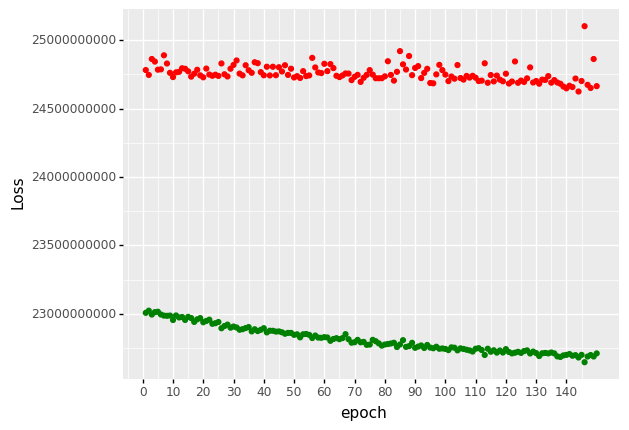

<ggplot: (89320850984)>

In [ ]:
# plot the training loss over epochs
def plot_loss(nn_model):
    loss_df = pd.DataFrame({
        'train_loss': nn_model.history.history['loss'],
        'val_loss': nn_model.history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, 151))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

plot_loss(simple_nn)

In [ ]:
# We are going to save all the components of the model
# note: We have to sav the training history separately
simple_nn.save('../dataset/simple_nn_model')

print("Storing the fitting history of simple nn to disk")
with open('../dataset/simple_nn_history.json', 'w') as handle:
    json.dump(simple_nn.history.history, handle)

INFO:tensorflow:Assets written to: ../dataset/simple_nn_model\assets
Storing the fitting history of simple nn to disk


In [ ]:
# We are going to load the model
simple_nn = keras.models.load_model("../dataset/simple_nn_model")
simple_nn

# We reload the fitting history
with open("../dataset/simple_nn_history.json", "r") as handle:
    simple_nn_history = json.load(handle)

In [ ]:
x_train_validation = np.concatenate([x_train, x_val])
y_train_validation = np.concatenate([y_train, y_val])

In [ ]:
# Since we have determined at least the number of epochs that gives us the best results on the validation dataset, we can train the model on the full train + validation set, and predict on the test set to get a final value for the model performance.
# For the activation function, we are using ReLu (Rectified Linear Unit) 
final_nn = Sequential()
final_nn.add(Dense(20, input_dim=x_train.shape[1], activation='relu'))
final_nn.add(Dense(1, activation='relu'))
final_nn.compile(loss='binary_crossentropy', optimizer='adam')
final_nn.fit(x_train_validation, y_train_validation, epochs=50, batch_size = 20, verbose=0)
y_hat_test_nn = final_nn.predict(x_test)
y_hat_test_nn = np.where(y_hat_test_nn >= 0.5, 1, 0)
print("The R2 score of the nn model is {}".format(r2_score(y_test, y_hat_test_nn)))

The R2 score of the nn model is -2.4627528239576164


In [ ]:
# Checken if we are not underfitting or underfitting
oversized_nn = Sequential()
oversized_nn.add(Dense(60, input_dim=x_train.shape[1], activation='relu'))
oversized_nn.add(Dense(40, activation='relu'))
oversized_nn.add(Dense(15, activation='relu'))
oversized_nn.add(Dense(1, activation='sigmoid'))
oversized_nn.compile(loss="binary_crossentropy", optimizer="adam")
oversized_nn.fit(x_train, y_train, epochs=150, batch_size = 20, validation_data=(x_val, y_val))

Epoch 1/150
6772/6772 [==============================] - 11s 2ms/step - loss: -747855610380288.0000 - val_loss: -3100848544546816.0000
Epoch 2/150
6772/6772 [==============================] - 11s 2ms/step - loss: -10201331159531520.0000 - val_loss: -23642197236645888.000099 - ETA: 7s - loss:
Epoch 3/150
6772/6772 [==============================] - 11s 2ms/step - loss: -51166207390253056.0000 - val_loss: -91537856295600128.0000
Epoch 4/150
6772/6772 [==============================] - 10s 2ms/step - loss: -147274480119447552.0000 - val_loss: -228058124852920320.0000
Epoch 5/150
6772/6772 [==============================] - 10s 2ms/step - loss: -330411524843634688.0000 - val_loss: -475082997083668480.0000
Epoch 6/150
6772/6772 [==============================] - 11s 2ms/step - loss: -653214360503582720.0000 - val_loss: -904956481214873600.0000
Epoch 7/150
6772/6772 [==============================] - 12s 2ms/step - loss: -1149465395963363328.0000 - val_loss: -1545654825981575168.0000
Epoch 8

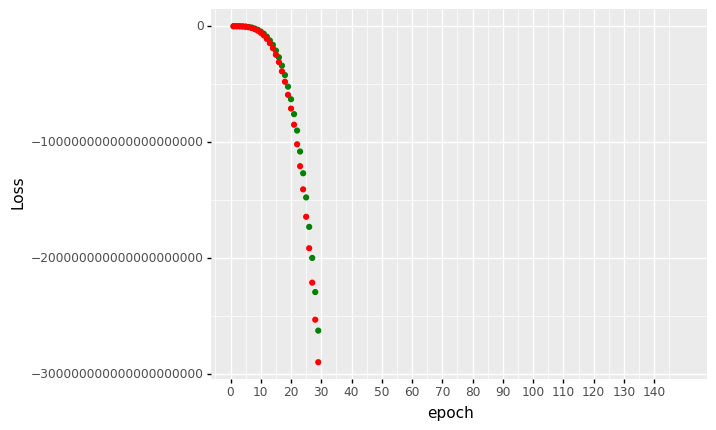

<ggplot: (89324157968)>

In [ ]:
# Creating a visual overview
plot_loss(oversized_nn)

# Hypertuning of neural network: batches, epochs, layers

In [ ]:
# We have to import new libraries
from scikeras.wrappers import KerasClassifier
import pickle
from sklearn.model_selection import GridSearchCV, PredefinedSplit
import datetime

In [ ]:
# constants
USE_STORED_SVC_HYPERTUNED_MODELS = True
USE_STORED_SVC_SKLEARNED_HYPERTUNED_MODELS = True
USE_STORED_NN_HYPERTUNED_MODELS = True

In [ ]:
# Creating the model
# We pass the number of neurons as a parameter to the network
def create_model(neurons=1):
    nn_model = Sequential()
    nn_model.add(Dense(neurons, input_dim=x_train.shape[1], activation="relu"))
    nn_model.add(Dense(1, activation='relu'))
    nn_model.compile(loss='binary_crossentropy', optimizer='adam')
    return nn_model

seed = 1234
np.random.seed(seed)

# We are going to turn the keras model into a sklearn compatible model
# note: the neurons parameter needs to be specified in the interface of KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0, neurons=1)


In [ ]:
# We are defining the grid search parameters
batch_size = [10, 20]
epochs = [100, 150]
neurons = [10, 20, 30]
params_grid = dict(batch_size=batch_size, epochs=epochs, neurons=neurons)

In [ ]:
params_grid

{'batch_size': [10, 20], 'epochs': [100, 150], 'neurons': [10, 20, 30]}

In [ ]:
fold_index = PredefinedSplit([-1]* x_train.shape[0] + [0] * x_val.shape[0])

In [ ]:
#perform grid search with sklearn if needed, otherwise load the grid search already performed
if os.path.exists("../dataset/nn_grid_search.pickle") and USE_STORED_NN_HYPERTUNED_MODELS is True:
    with open('../dataset/nn_grid_search.pickle', 'rb') as handle:
        grid_search_nn = pickle.load(handle)
else:
    start_time = datetime.datetime.now()
    grid_search_nn = GridSearchCV(estimator=model, param_grid=params_grid, n_jobs=-1, cv=fold_index)
    grid_search_nn = grid_search_nn.fit(x_train_validation, y_train_validation)
    end_time = datetime.datetime.now()
    print(f'hypertuning with sklearn grid search for neural networks complete in {round((end_time - start_time).seconds/60, 2)} minutes')
    # store the results of the grid search to disk
with open('../dataset/nn_grid_search.pickle', 'wb') as handle:
    pickle.dump(grid_search_nn, handle)

hypertuning with sklearn grid search for neural networks complete in 183.48 minutes
INFO:tensorflow:Assets written to: C:\Users\j-phh\AppData\Local\Temp\tmpor4r9dk1\assets


In [ ]:
grid_search_nn

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=KerasClassifier(build_fn=<function create_model at 0x0000014CC20D8AF0>, neurons=1, verbose=0),
             n_jobs=-1,
             param_grid={'batch_size': [10, 20], 'epochs': [100, 150],
                         'neurons': [10, 20, 30]})

In [ ]:
print("The best parameter combination is: {} with score: {}".format(grid_search_nn.best_params_, grid_search_nn.best_score_))

The best parameter combination is: {'batch_size': 10, 'epochs': 100, 'neurons': 10} with score: 0.003071561475530878


We are now going to train a model with the best parameters found on train and validation, together:

In [ ]:
best_model = create_model(20)
best_model.fit(x_train_validation, y_train_validation, epochs=100, batch_size=10, verbose=0)

In [ ]:
# We can then evaluate the model so trained on the test set:
y_hat_test = best_model.predict(x_test)
y_hat_test = np.where(y_hat_test >= 0.5, 1, 0)
r2_score(y_test, y_hat_test)

-2.4627528239576164